In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
#load Sleep_health_data.csv
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data Processing 01

In [3]:
# check for missing values or NaN
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [4]:
#replace the NaN with None value in Sleep Disorder Column
df["Sleep Disorder"].fillna("None", inplace=True)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
# drop Person ID
df.drop('Person ID', axis=1, inplace=True)

In [6]:
#checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col,len(df[col].unique()))

Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


In [7]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### Splitting the blood pressure into systolic and diastolic   

In [8]:
#spliting the blood pressure into two columns
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
# drop Blood Pressure column
df.drop(['Blood Pressure'], axis=1, inplace=True)

In [17]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [15]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


### Checking the unique values from each categorical column

In [18]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese']


['None' 'Sleep Apnea' 'Insomnia']


## Explorative Data Analysis

### 01: Understanding the data by plotting its variables

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

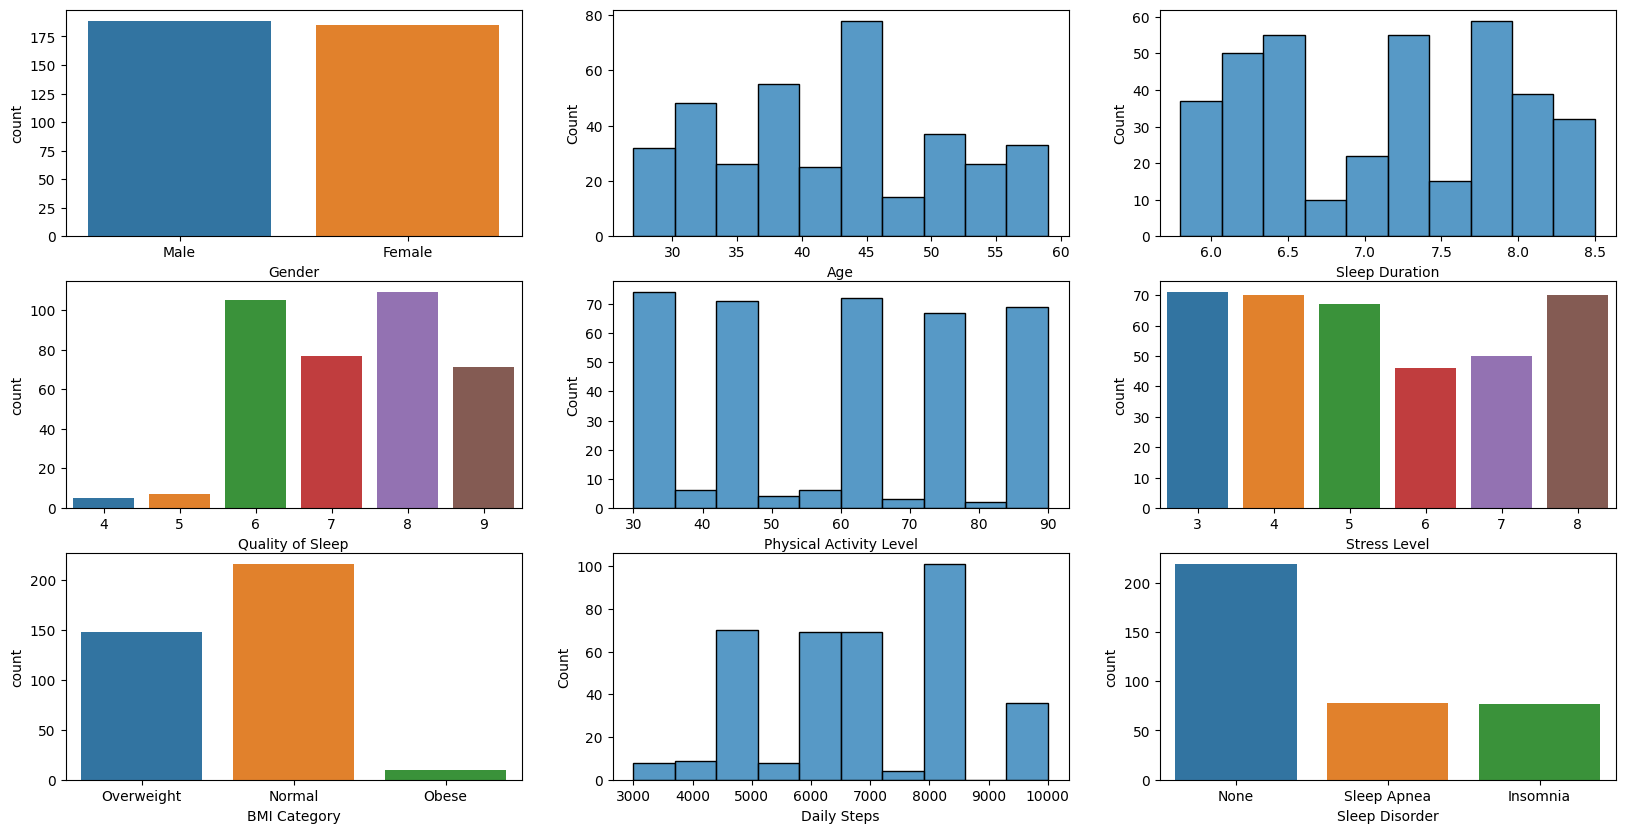

In [19]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = ax[0,0])
sns.histplot(x = 'Age', data = df, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = df, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = df, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level', data = df, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = df, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = df, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = df, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = df, ax = ax[2,2])

The number of males and females is almost equal, out of which majority of the people have age between 30-45 years. Most of the people have sleep quality greater than 5 which means there are getting sufficient sleep. Moreover, most of the people have normal BMI whci directly relates with the distribution of sleep disorder which shows equal number of people with and without sleep disorder.

### 02: Understanding the correlation between the variables

#### 2.1 Gender vs Sleep Disorder

Text(0.5, 1.0, 'Gender vs Sleep Disorder')

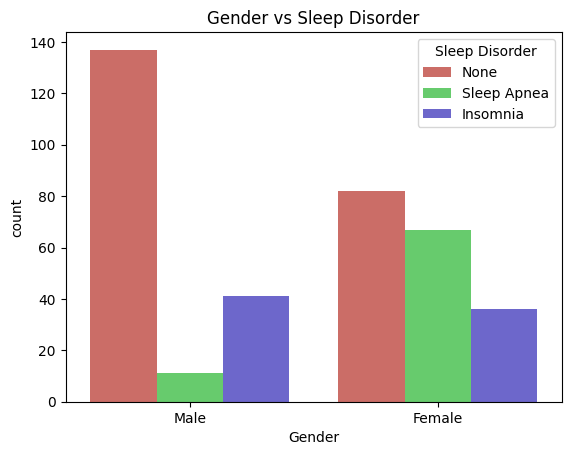

In [20]:
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder').set_title("Gender vs Sleep Disorder")

Most of the males and females are not suffering from any sleep disorder. However females tend to have more sleep disorder as compared to males. The number of females suffering from Sleep Apnea is quite high as compared to males. But in contrast to that, greater number of males are suffering from Insomia as compared to females.

### 2.2 Occupation vs Sleep Disorder

[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

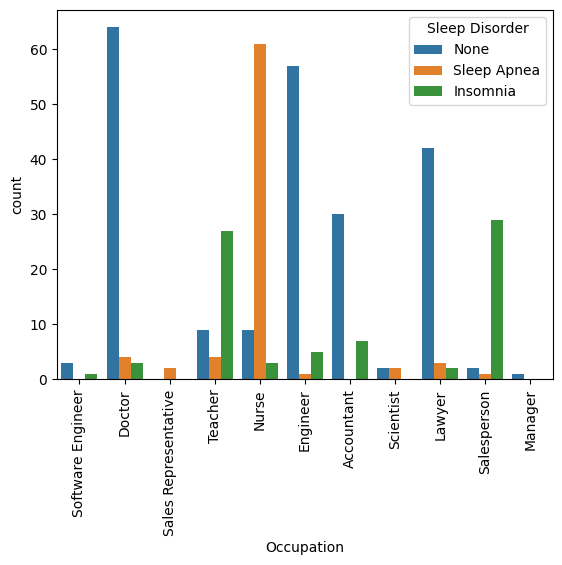

In [28]:
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

From the graph it is clear that the occupation has huge impact on the sleep disorder. Nurses are more subjected to have Sleep Apenea as compared to other occupations and very few of them have no sleep disorder. After nurses, the next most affected occupation is the Salesperson, which counts for the  most suffering from Insomia followed by teachers. However there are some occupations where most of the people have very few instance of Sleep Apenea and Insomia such as Engineers, Doctors, Accountants, Lawyers. 
The Software ENgineers and Managers are so less in number so I cannot say much about that, But the occupation Sales Representative has shown only Sleep Apenea and no Insomia or No sleep disorder. 

### 2.3 BMI vs Sleep Disorder

Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

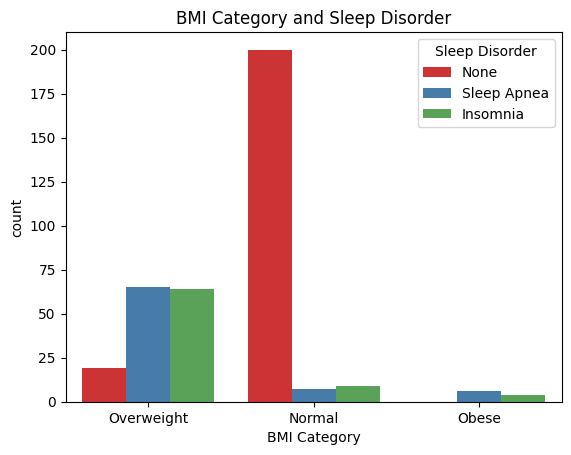

In [29]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df, palette = 'Set1').set_title('BMI Category and Sleep Disorder')

People with normal BMI are less likely to suffer from any sleep disorder. However, this is opposite in case of Overweight and Obese people. Overweight are more likely to suffer more from sleep disordera than Obese people.

## Data Processing 02

#### Label Encoding for categorical variables

In [30]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [31]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [32]:
vars = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


## Correlation Matrix Heatmap

/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_86149/3570875960.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<AxesSubplot:>

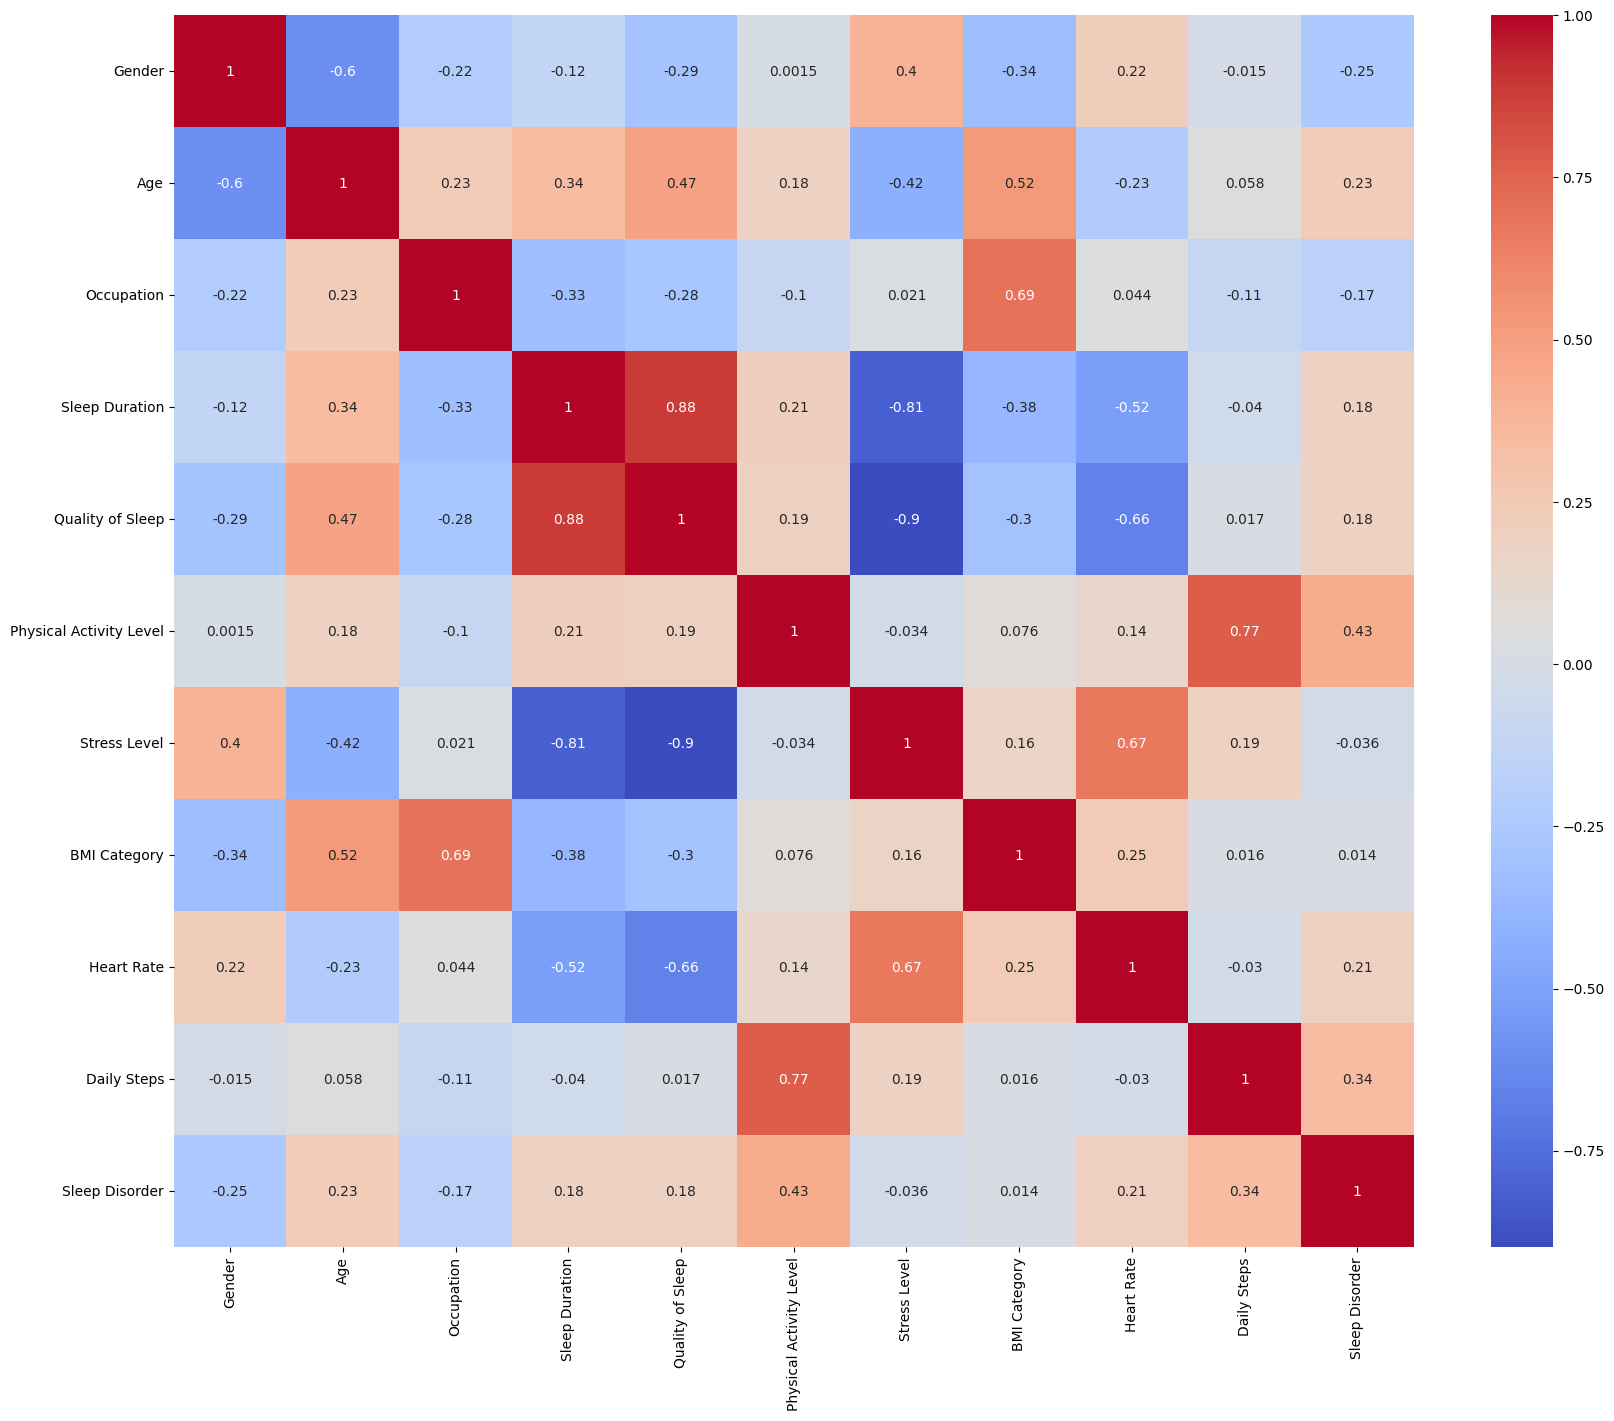

In [33]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder',axis=1), df['Sleep Disorder'], test_size=0.3, random_state=42)

## Model Building

For predictiong the sleep disorder thriugh classification algorithms I will use the following algorithms:


### 1. Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

Training the model with train dataset

In [36]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
#training accuracy
print("Training Accuracy:",dtree.score(X_train,y_train))

Training Accuracy: 0.9348659003831418


#### 1.1 Decision Tree Model Evalution

Run prediction on test dataset

In [38]:
d_pred = dtree.predict(X_test)
d_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1,
       2, 1, 0])

Using Confusion matrix heatmap to visualize the model accuracy

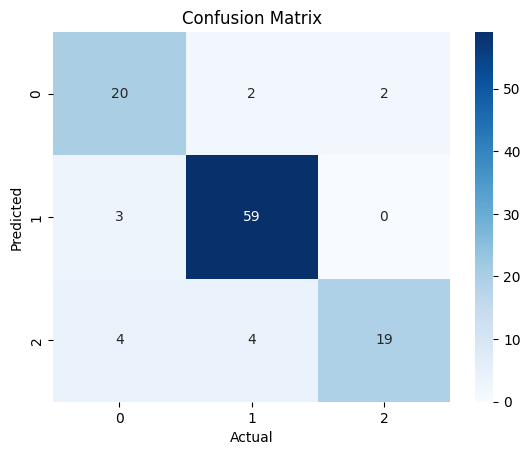

In [39]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

The diagonal boxes show the count of true positive results, i.e correct predictions made by the model. The off-diagonal boxes show the count of false positive results, i.e incorrect predictions made by the model.

#### 1.2 Distribution plot for predicted and actual values

/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_86149/174176785.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_86149/174176785.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

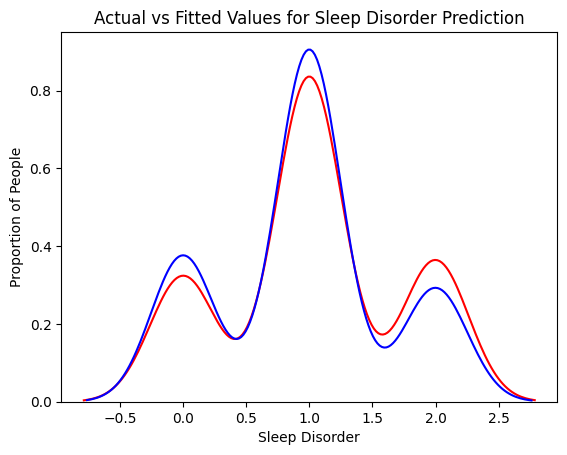

In [44]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

The actual values are represented with red and the predicted ones with blue. As shown in the graph, the model's prediction are able to follow the curve of actual values but the predicted values are still different from actual ones. Therefore the model is not able to predict the values accurately.

##### 1.3 Classification Report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.91      0.95      0.93        62
           2       0.90      0.70      0.79        27

    accuracy                           0.87       113
   macro avg       0.85      0.83      0.84       113
weighted avg       0.87      0.87      0.87       113

